# Descripción del proyecto

La cadena de gimnasios Model Fitness está desarrollando una estrategia de interacción con clientes basada en datos analíticos.

Uno de los problemas más comunes que enfrentan los gimnasios y otros servicios es la pérdida de clientes. ¿Cómo descubres si un/a cliente ya no está contigo? Puedes calcular la pérdida en función de las personas que se deshacen de sus cuentas o no renuevan sus contratos. Sin embargo, a veces no es obvio que un/a cliente se haya ido: puede que se vaya de puntillas.

Los indicadores de pérdida varían de un campo a otro. Si un usuario o una usuaria compra en una tienda en línea con poca frecuencia, pero con regularidad, no se puede decir que ha huido. Pero si durante dos semanas no ha abierto un canal que se actualiza a diario, es motivo de preocupación: es posible que tu seguidor o seguidor/a se haya aburrido y te haya abandonado.

En el caso de un gimnasio, tiene sentido decir que un/a cliente se ha ido si no viene durante un mes. Por supuesto, es posible que estén en Cancún y retomen sus visitas cuando regresen, pero ese no es un caso típico. Por lo general, si un/a cliente se une, viene varias veces y luego desaparece, es poco probable que regrese.

Con el fin de combatir la cancelación, Model Fitness ha digitalizado varios de sus perfiles de clientes. Tu tarea consiste en analizarlos y elaborar una estrategia de retención de clientes.

Tienes que:

1. Aprender a predecir la probabilidad de pérdida (para el próximo mes) para cada cliente.
2. Elaborar retratos de usuarios típicos: selecciona los grupos más destacados y describe sus características principales.
3. Analizar los factores que más impactan la pérdida.
4. Sacar conclusiones básicas y elaborar recomendaciones para mejorar la atención al cliente:
   - identificar a los grupos objetivo;
   - sugerir medidas para reducir la rotación;
   - describir cualquier otro patrón que observes con respecto a la interacción con los clientes.

## Instrucciones para completar el proyecto

### Paso 1. Descargar los datos

Model Fitness te aportó archivos CSV que contienen los datos sobre la cancelación de un mes en concreto e información del mes que lo precedía. El dataset incluye los siguientes campos:

- 'Churn' — la cancelación para el mes en cuestión

#### Campos de dataset actuales:

**Datos del usuario del mes anterior**

- 'gender'
- 'Near_Location' — si el/la usuario/a vive o trabaja en el vecindario donde se encuentra el gimnasio.
- 'Partner' — si el/la usuario/a trabaja en una compañía asociada (el gimnasio tiene empresas asociadas cuyos empleados obtienen descuentos; en esos casos el gimnasio almacena información sobre los empleadores de los clientes).
- 'Promo_friends' — si el/la usuario/a originalmente se inscribió mediante una oferta “trae a un/a amigo/a” (se utilizó el código promocional de un/a amigo/a cuando pagaron el primer abono).
- 'Phone' — si el/la usuario/a aportó el número de teléfono.
- 'Age'
- 'Lifetime' — el tiempo (en meses) desde que el/la usuario/a llegó por primera vez al gimnasio.

**Datos del registro de visitas y compras y datos sobre el estado actual de la membresía:**

- 'Contract_period' — 1 mes, 3 meses, 6 meses o 1 año.
- 'Month_to_end_contract' — los meses que faltan hasta que expire el contrato.
- 'Group_visits' — si el/la usuario/a participa en sesiones grupales.
- 'Avg_class_frequency_total' — frecuencia media de visitas por semana a lo largo de la vida del cliente.
- 'Avg_class_frequency_current_month' — frecuencia media de visitas por semana durante el mes en curso.
- 'Avg_additional_charges_total' — cantidad total de dinero gastado en otros servicios del gimnasio: cafetería, productos deportivos, cosméticos, masajes, etc.

Ruta de archivo: `/datasets/gym_churn_us.csv`. Descargar el dataset. 

### Paso 2. Llevar a cabo el análisis exploratorio de datos (EDA)

1. Observa el dataset: ¿contiene alguna característica ausente? Estudia los valores promedio y la desviación estándar (utiliza el método `describe()`).
2. Observa los valores medios de las características en dos grupos: para las personas que se fueron (cancelación) y para las que se quedaron (utiliza el método `groupby()`).
3. Traza histogramas de barras y distribuciones de características para aquellas personas que se fueron (cancelación) y para las que se quedaron.
4. Crea una matriz de correlación y muéstrala.

### Paso 3. Construir un modelo para predecir la cancelación de usuarios

1. Crea un modelo de clasificación binaria para clientes donde la característica objetivo es la marcha del usuario o la usuaria el mes siguiente.
2. Divide los datos en conjuntos de entrenamiento y validación utilizando la función `train_test_split()`.
3. Entrena el modelo en el set de entrenamiento con dos métodos:
   - regresión logística;
   - bosque aleatorio.
4. Evalúa la exactitud, precisión y recall para ambos modelos utilizando los datos de validación. Utilízalos para comparar los modelos. ¿Qué modelo dio mejores resultados?
5. Recuerda indicar el parámetro `random_state` cuando dividas los datos y definas el algoritmo. 

### Paso 4. Crear clústeres de usuarios/as

1. Deja de lado la columna con datos sobre la cancelación e identifica los clústeres de objetos (usuarios/as):
   - Estandariza los datos.
   - Utiliza la función `linkage()` para crear una matriz de distancias basada en la matriz de características estandarizada y trazar un dendrograma. Nota: ¡renderizar el dendrograma puede llevar tiempo! Utiliza el gráfico resultante para estimar el número de clústeres que puedes destacar.
   - Entrena el modelo de clustering con el algoritmo K-means y predice los clústeres de clientes. (Deja que el número de clústeres sea n=5 para que sea más sencillo comparar los resultados con los del resto del estudiantado. Sin embargo, en la vida real, nadie te dará tales pistas, así que tendrás que decidir basándote en el gráfico del paso anterior.)
2. Mira los valores medios de característica para los clústeres. ¿Hay algo que te llame la atención?
3. Traza distribuciones de características para los clústeres. ¿Notas algo?
4. Calcula la tasa de cancelación para cada clúster (utiliza el método `groupby()`). ¿Difieren en términos de tasa de cancelación? ¿Qué grupos son propensos a irse y cuáles son leales?

### Paso 5. Saca conclusiones y haz recomendaciones básicas sobre el trabajo con clientes

Llega a conclusiones y formula recomendaciones con respecto a la estrategia para la interacción y retención de clientes.

No necesitas entrar en detalles. Bastarán tres o cuatro principios esenciales y ejemplos de su implementación en forma de pasos de marketing específicos.


In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_auc_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

## Análisis exploratorio de datos (EDA)

In [2]:
gym = pd.read_csv('/datasets/gym_churn_us.csv')

In [3]:
gym.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [4]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

### ¿contiene alguna característica ausente?

In [5]:
gym.isna().sum()

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

No tenemos datos vacios 

In [6]:
gym.duplicated().sum()

0

No tenemos datos duplicados

### Estudia los valores utilizando el método describe()

In [7]:
gym.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
Near_Location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
Partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
Promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
Phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
Contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
Group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
Age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
Avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
Month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


- **Período de contratación de la membresía**:
  - En promedio, el período de contratación de la membresía es de alrededor de 5 meses.

- **Edad promedio de los usuarios**:
  - La edad promedio es de 29 años.

- **Tiempo promedio hasta el final de la membresía**:
  - El tiempo promedio para que finalice la membresía (`month_to_end_contract`) es de 4.3 meses.

- **Tiempo en el gimnasio desde la primera visita**:
  - El tiempo en meses desde que el usuario llegó por primera vez al gimnasio (`lifetime`) es de 3.7 meses en promedio.

- **Frecuencia media de visitas por semana a lo largo de la vida del cliente**:
  - La frecuencia media de visitas por semana a lo largo de la vida del cliente (`avg_class_frequency_total`) es de 1.8, aproximadamente 2 visitas.

- **Frecuencia media de visitas por semana durante el mes en curso**:
  - La frecuencia media de visitas por semana durante el mes en curso (`avg_class_frequency_current_month`) es de 1.7, aproximadamente 2 visitas.

- **Cantidad total de dinero gastado en otros servicios del gimnasio**:
  - La cantidad total de dinero gastado en otros servicios del gimnasio (`avg_additional_charges_total`) es de 146.9 en promedio.


In [8]:
gym.columns=gym.columns.str.lower()

In [9]:
gym.columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

In [10]:
gym.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


### Observa los valores medios de las características en dos grupos: para las personas que se fueron (cancelación) y para las que se quedaron (utiliza el método groupby()).

In [11]:
gym['churn'].value_counts()

0    2939
1    1061
Name: churn, dtype: int64

In [12]:
1061/4000*100

26.525

El 26,5% de los miembros abandonaron su membresía

In [13]:
gym.groupby('churn').mean().T

churn,0,1
gender,0.510037,0.510839
near_location,0.873086,0.768143
partner,0.534195,0.355325
promo_friends,0.353522,0.183789
phone,0.903709,0.902922
contract_period,5.747193,1.728558
group_visits,0.464103,0.268615
age,29.976523,26.989632
avg_additional_charges_total,158.445715,115.082899
month_to_end_contract,5.283089,1.662582


- **Período de membresía para usuarios que cancelaron**:
  - En promedio, la membresía contratada fue de 1.7 meses (aproximadamente 2 meses).

- **Edad promedio de los usuarios que cancelaron**:
  - La edad promedio fue de 26.9 años (alrededor de 27 años).

- **Cantidad total de dinero gastado en otros servicios del gimnasio**:
  - Para los usuarios que cancelaron, la cantidad total fue de 115.
  - Para los usuarios que no cancelaron, la cantidad total fue de 158.4.

- **Tiempo promedio hasta el final de la membresía para usuarios que cancelaron**:
  - El tiempo promedio para que finalizara la membresía fue de 1.6 meses.

- **Tiempo en el gimnasio desde la primera visita para usuarios que cancelaron**:
  - El tiempo en meses desde la primera visita al gimnasio fue de 0.99 (aproximadamente 1 mes).

- **Frecuencia media de visitas por semana**:
  - Para los usuarios que cancelaron, la frecuencia media de visitas por semana fue de aproximadamente 1.
  - Para los usuarios que no cancelaron, la frecuencia media de visitas por semana fue el doble.


### Traza histogramas de barras y distribuciones de características para aquellas personas que se fueron (cancelación) y para las que se quedaron.

In [14]:
churned = gym[gym['churn'] == 1] 
stayed = gym[gym['churn'] == 0]

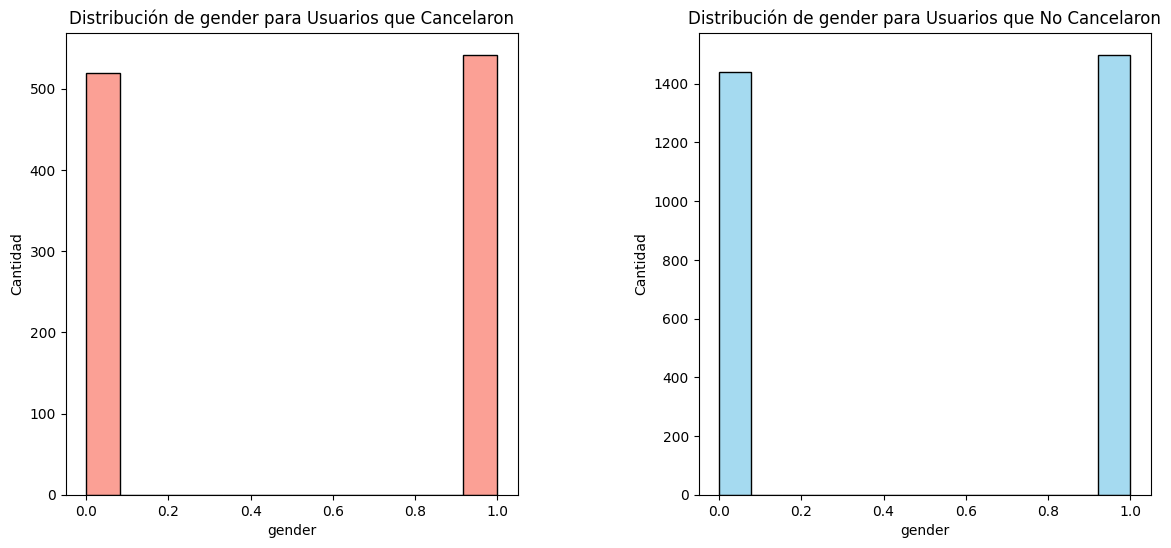

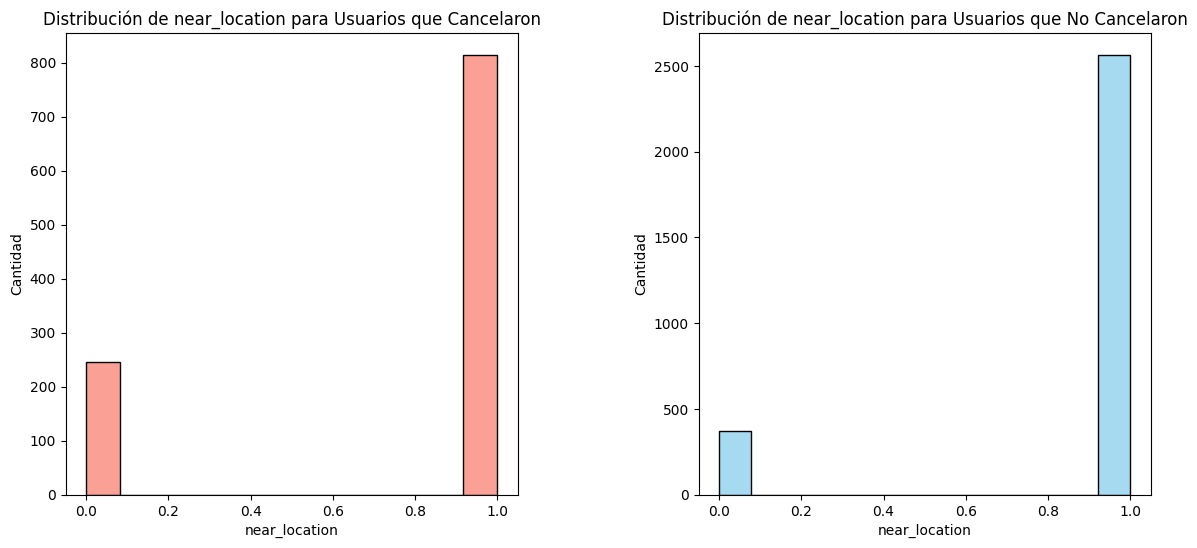

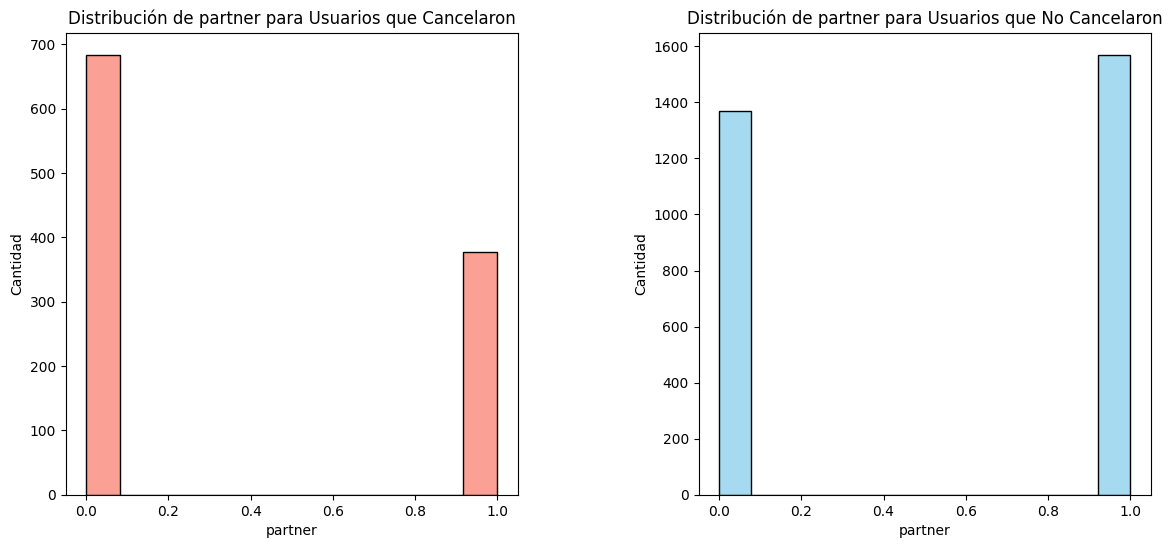

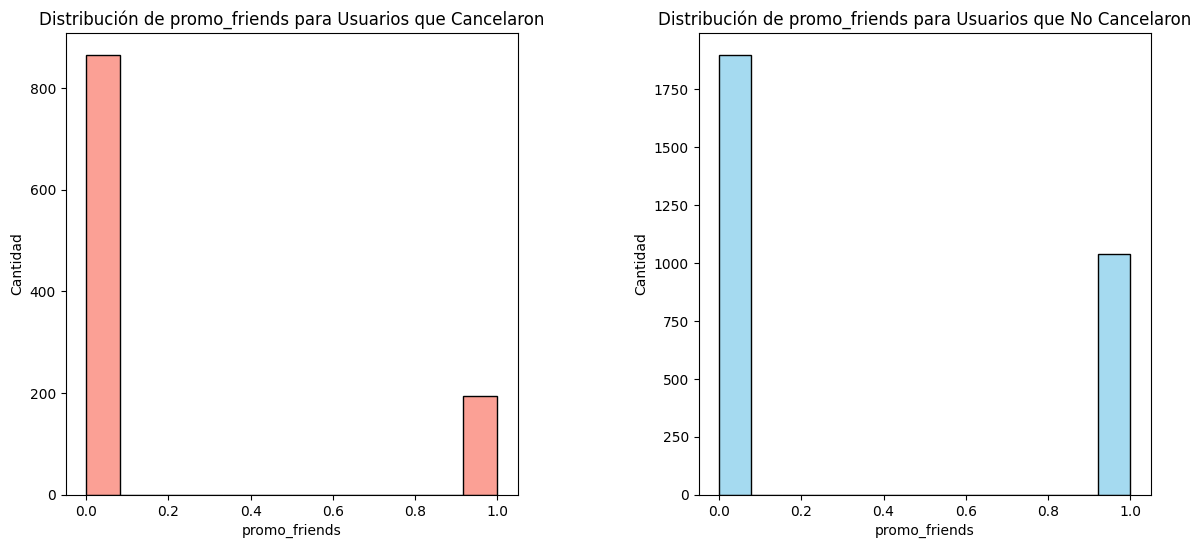

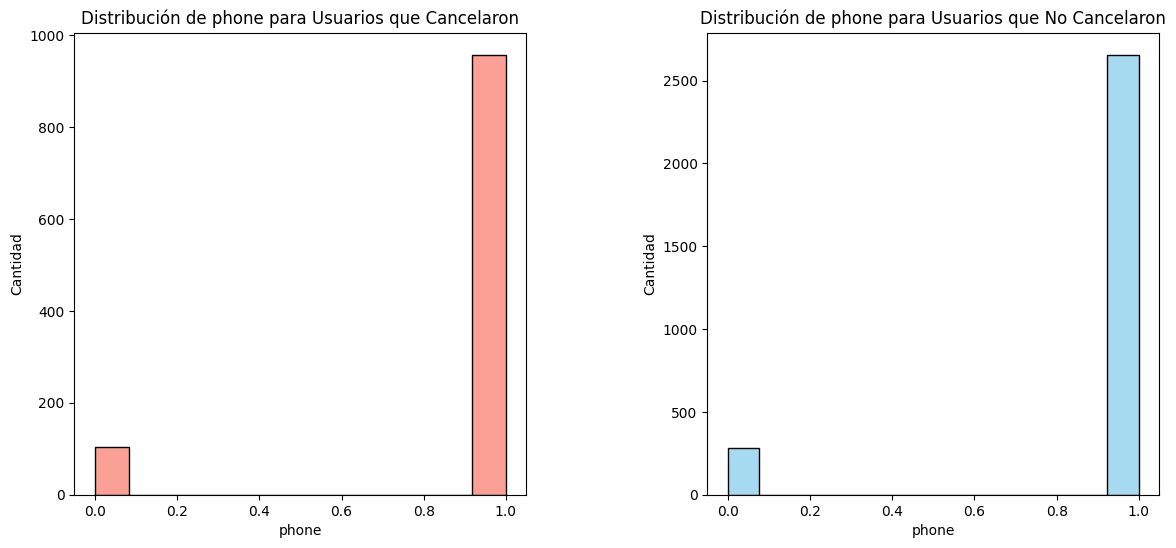

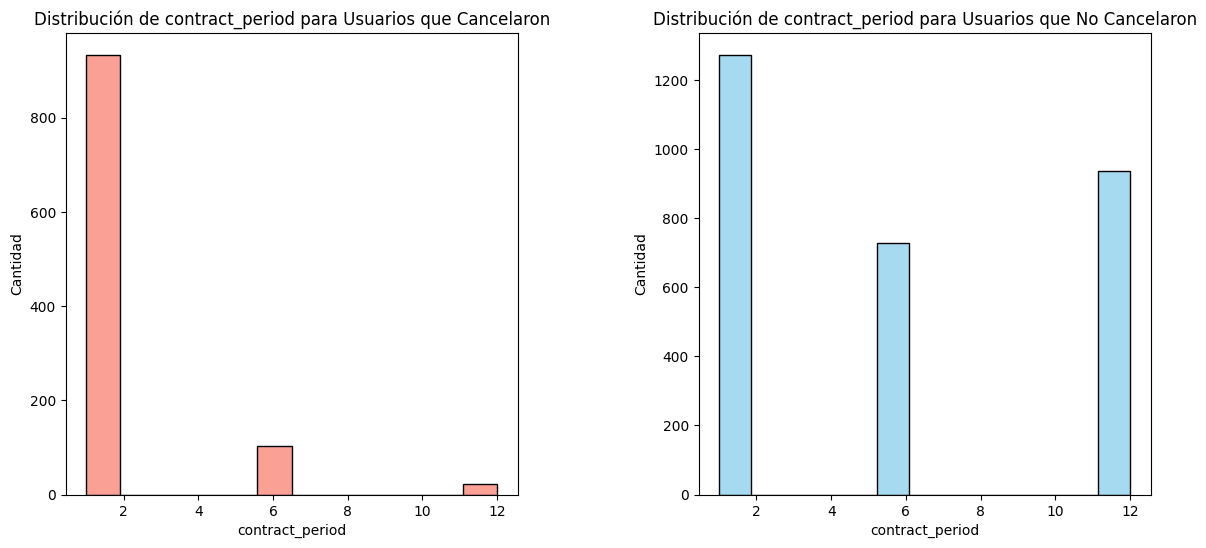

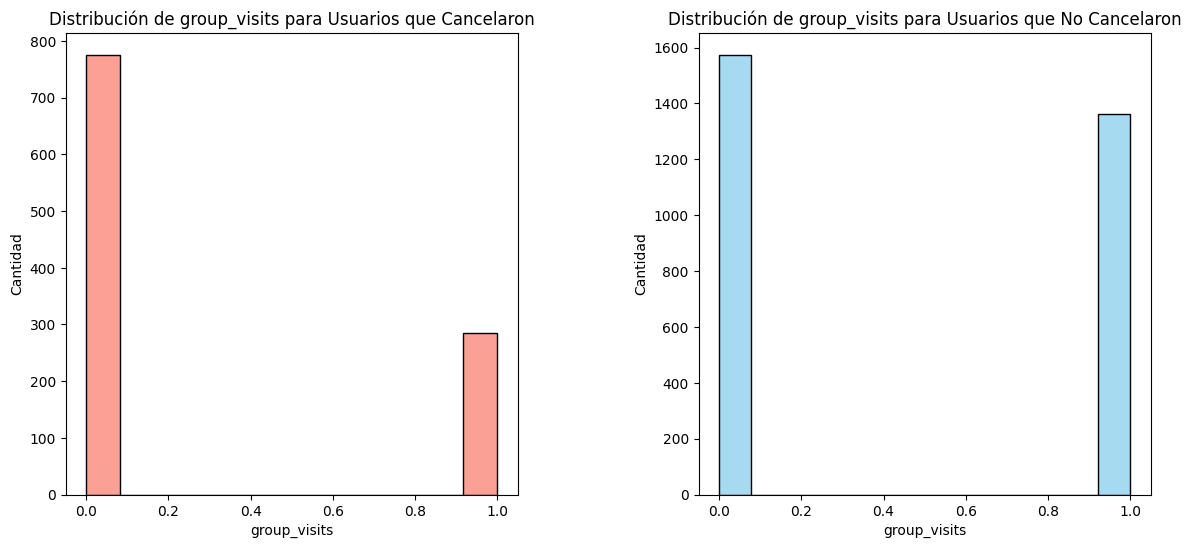

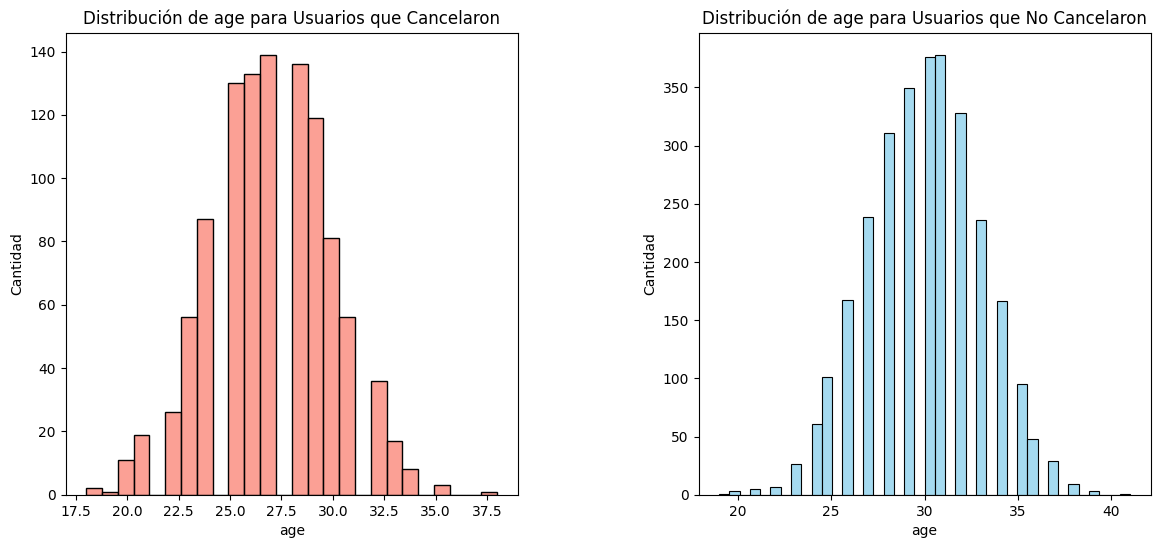

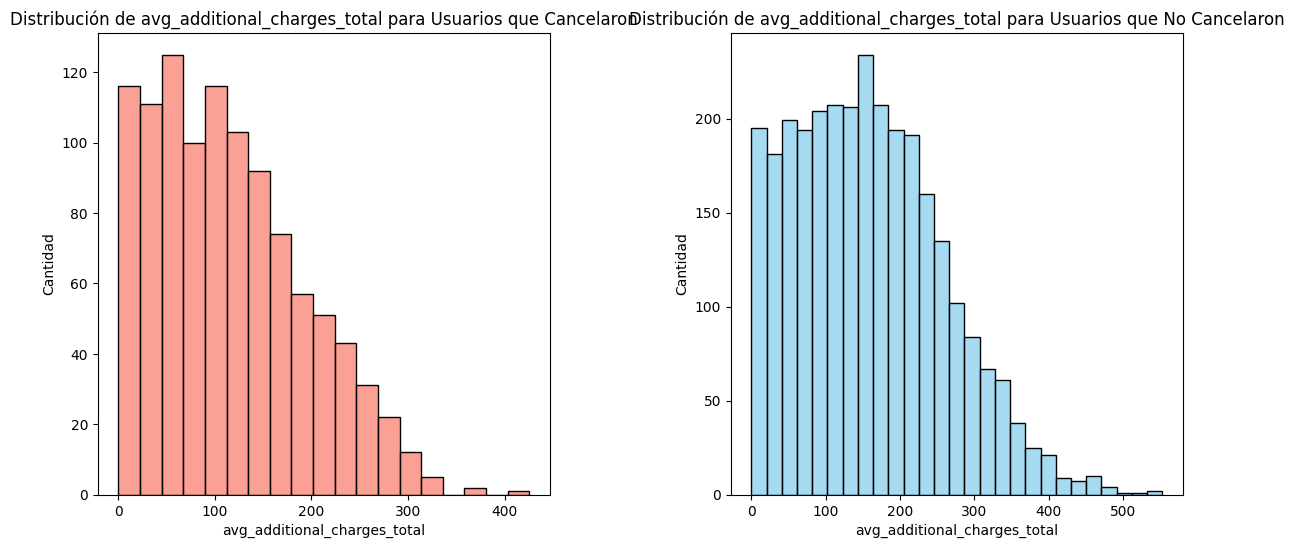

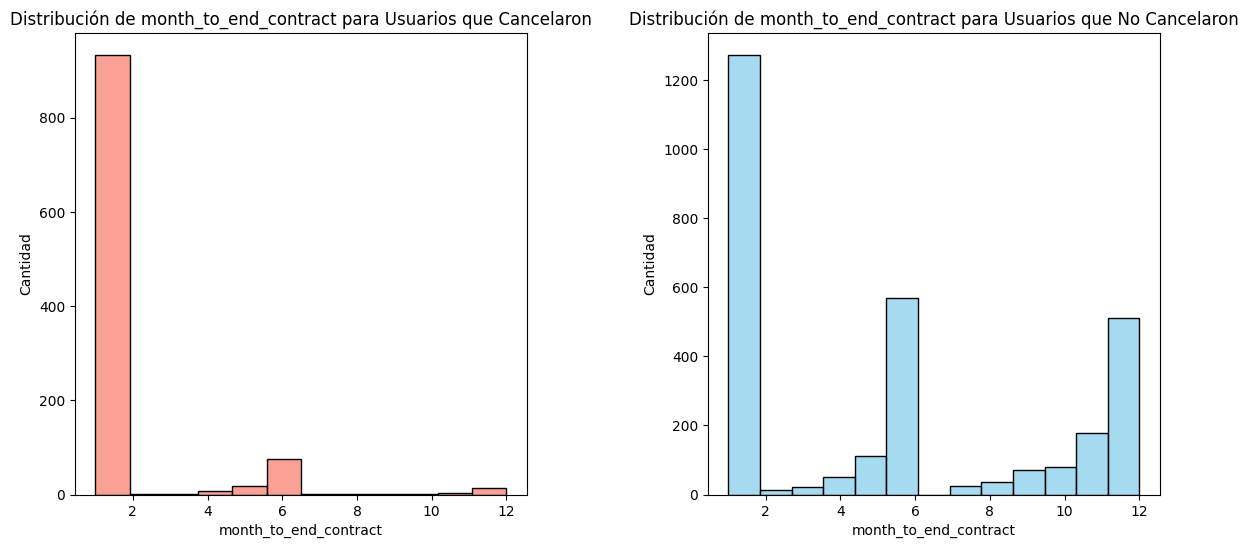

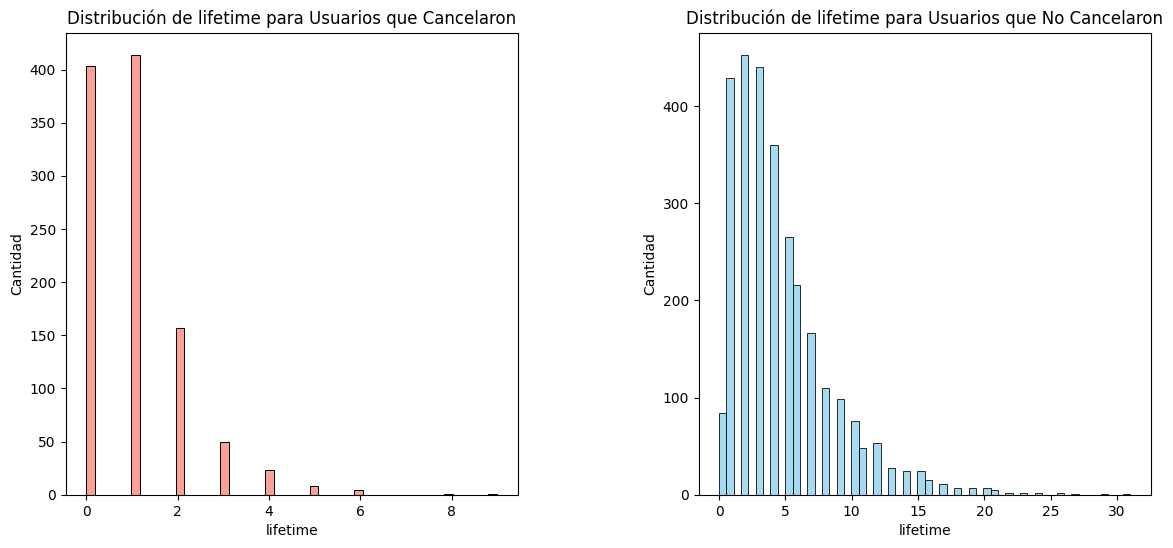

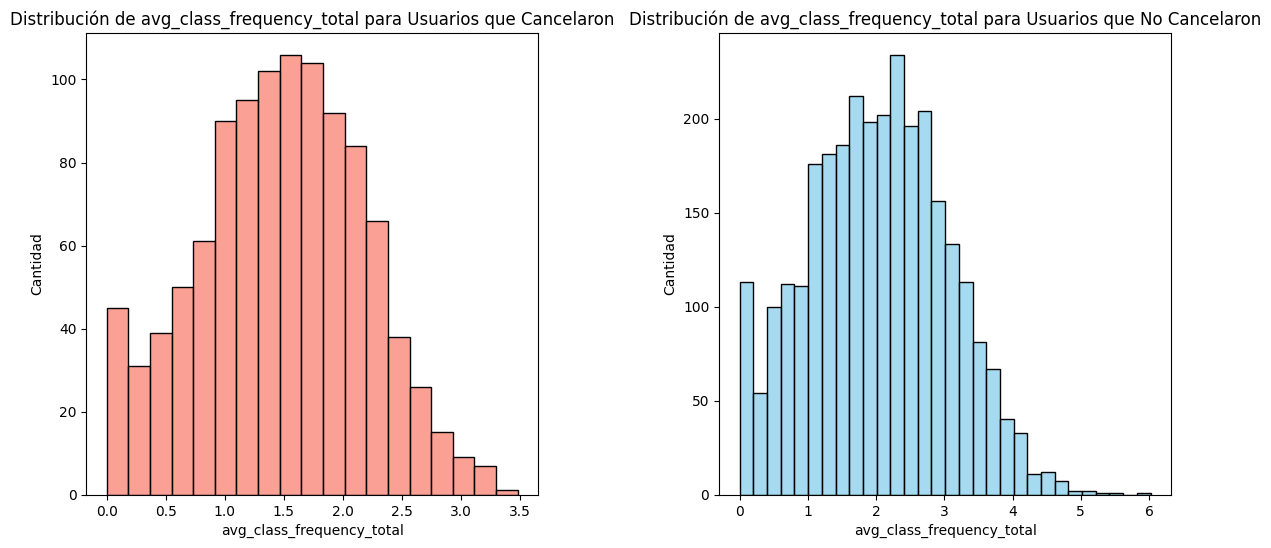

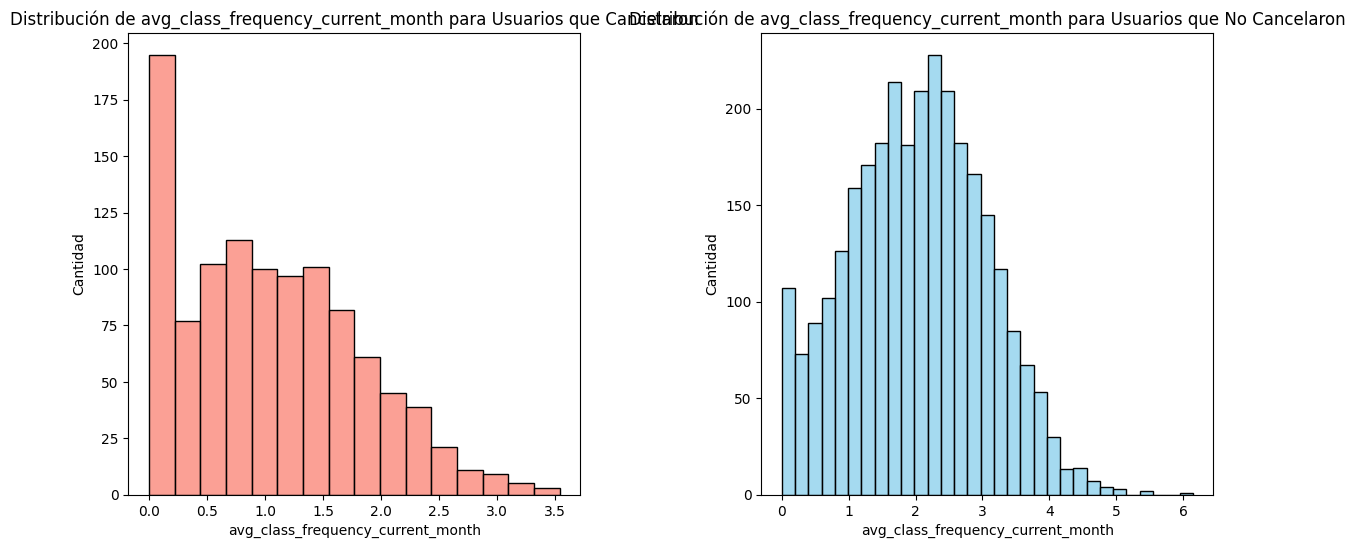

In [15]:
for var in gym.columns:
    if var != 'churn':
        plt.figure(figsize=(14, 6))

        # usuarios que cancelaron
        plt.subplot(1, 2, 1)
        sns.histplot(data=churned, x=var, kde=False, label='Cancelaron', color='salmon')
        plt.xlabel(var)
        plt.ylabel('Cantidad')
        plt.title(f'Distribución de {var} para Usuarios que Cancelaron')

        # usuarios que no cancelaron
        plt.subplot(1, 2, 2)
        sns.histplot(data=stayed, x=var, kde=False, label='No Cancelaron', color='skyblue')
        plt.xlabel(var)
        plt.ylabel('Cantidad')
        plt.title(f'Distribución de {var} para Usuarios que No Cancelaron')

       
        plt.subplots_adjust(wspace=0.4)
        plt.show()




Los gráficos muestran diferencias clave entre los clientes que abandonan el gimnasio y los que se quedan:

- **Clientes que abandonan**:
  - Viven cerca pero no suelen trabajar para empresas asociadas ni inscribirse a través de amigos.
  - Prefieren contratos cortos (generalmente de un mes) y no permanecen mucho tiempo en el gimnasio.
  - Asisten a un promedio de solo tres clases.

- **Clientes que se quedan**:
  - También viven cerca del gimnasio.
  - Muchos trabajan en empresas asociadas y aproximadamente la mitad se inscribieron a través de un amigo.
  - Tienen una variedad de duraciones de contrato y casi la mitad disfruta de sesiones grupales.
  - Invierten más en funciones adicionales del gimnasio y asisten a más clases.


### Crea una matriz de correlación y muéstrala.

In [16]:
corr=gym.corr()

<AxesSubplot:>

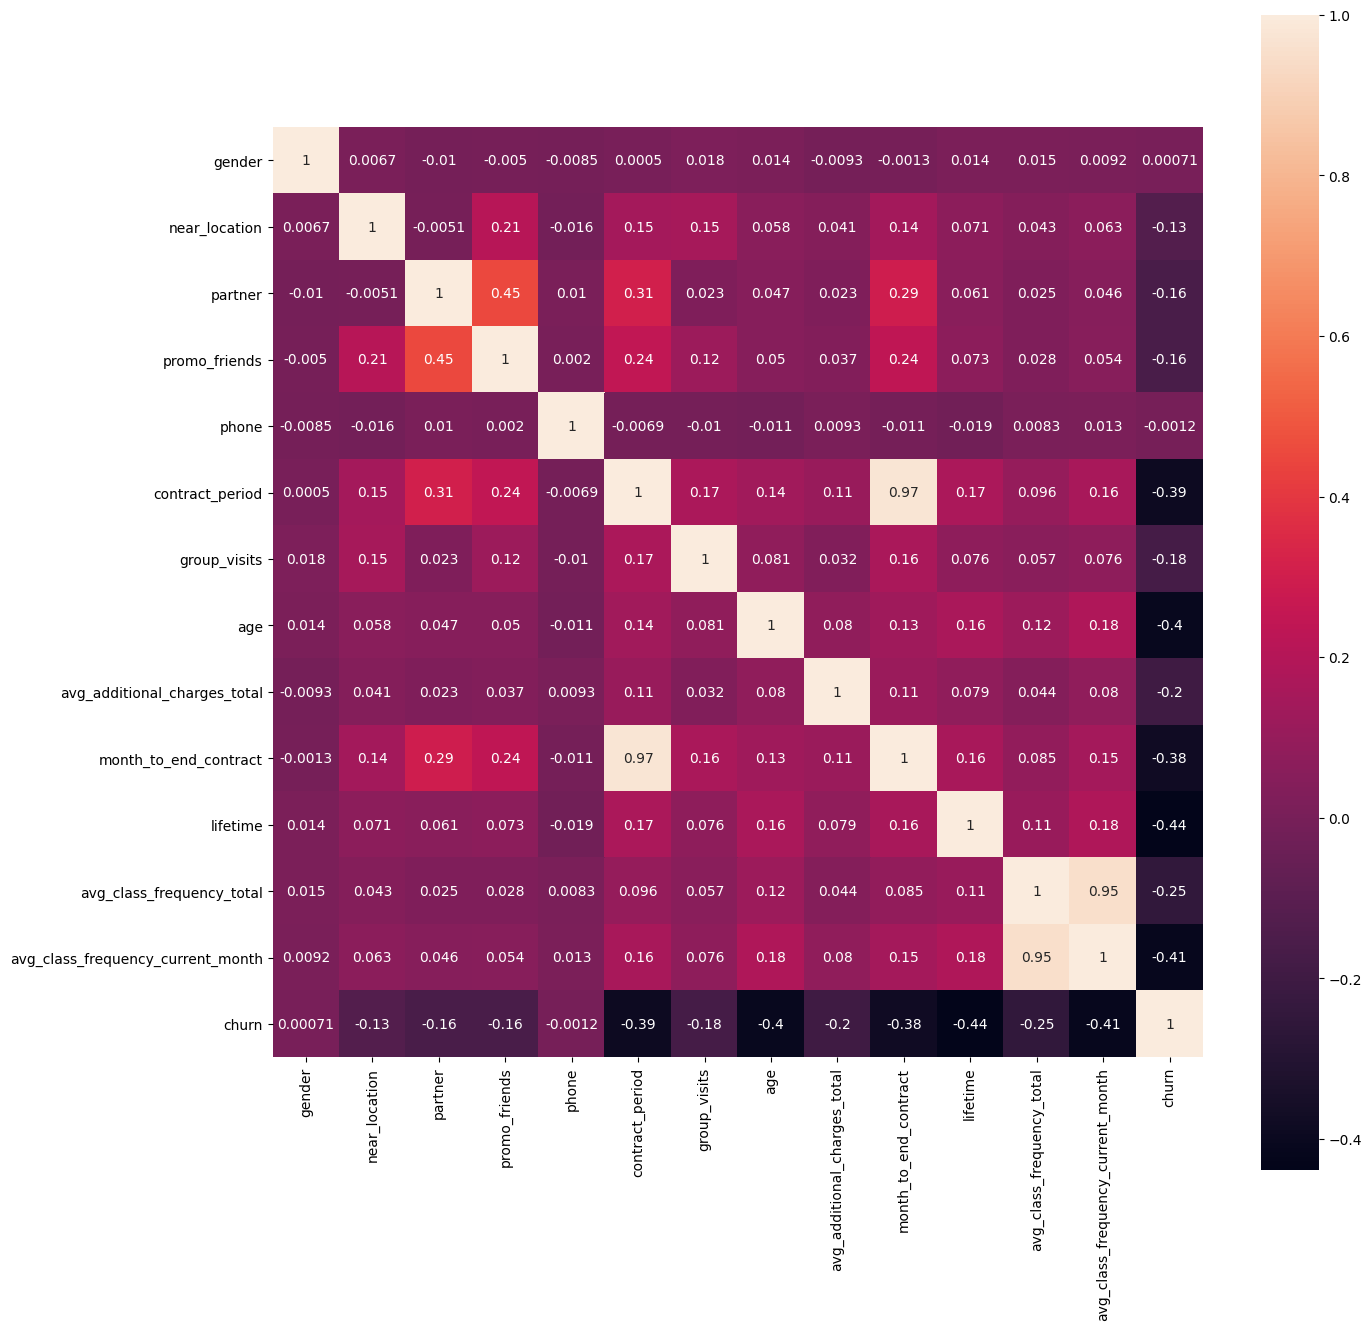

In [17]:
plt.figure(figsize=(15,15))
sns.heatmap(corr,square=True, annot=True,)

La matriz de correlación indica una fuerte relación entre 'contact_period' y 'month_to_end_contract', así como entre 'avg_class_frequency_total' y 'avg_class_frequency_current_month'.

## Modelo para predecir la cancelación de usuarios

### Divide los datos en conjuntos de entrenamiento y validación utilizando la función train_test_split()

In [18]:
X = gym.drop('churn', axis = 1)
y = gym['churn']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Entrena el modelo en el set de entrenamiento con dos métodos:
   - regresión logística;
   - bosque aleatorio.

In [19]:
lr_model = LogisticRegression(random_state=0, max_iter=1000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [20]:
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

### Evalúa la exactitud, precisión y recall para ambos modelos utilizando los datos de validación. Utilízalos para comparar los modelos. ¿Qué modelo dio mejores resultados?

In [21]:
def print_all_metrics(y_true, y_pred, y_proba, title = 'Metricas de clasificación'):
    print(title)
    print('\tExactitud: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecisión : {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecuperación: {:.2f}'.format(recall_score(y_true, y_pred)))

In [22]:
lr_predictions = lr_model.predict(X_test)
lr_probabilities = lr_model.predict_proba(X_test)[:,1]
print_all_metrics(y_test, lr_predictions, lr_probabilities, title='Metricas para regresión logística:')


Metricas para regresión logística:
	Exactitud: 0.92
	Precisión : 0.86
	Recuperación: 0.83


In [23]:
rf_predictions = rf_model.predict(X_test)
rf_probabilities = rf_model.predict_proba(X_test)[:,1]
print_all_metrics(y_test, rf_predictions, rf_probabilities, title='Metricas para bosque aleatorio:')


Metricas para bosque aleatorio:
	Exactitud: 0.92
	Precisión : 0.84
	Recuperación: 0.82


Ambos modelos funcionaron bien, pero el modelo de regresión logística tuvo una ligera ventaja con mayor precisión y recuperación.

## Clústeres de usuarios/as

### Estandariza los datos.

In [24]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)

### Utiliza la función linkage() para crear una matriz de distancias basada en la matriz de características estandarizada y trazar un dendrograma.

In [25]:
linked = linkage(X_sc, method = 'ward')

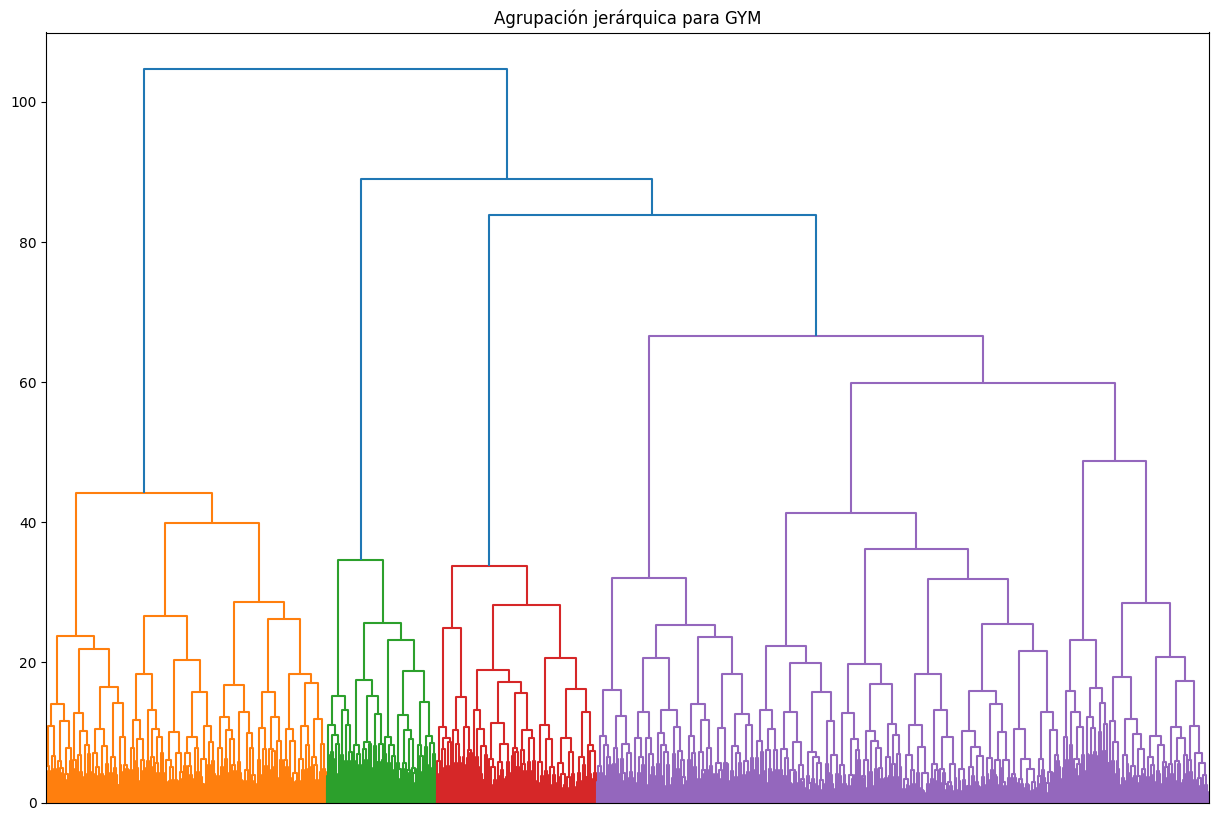

In [26]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Agrupación jerárquica para GYM');
plt.xticks([])
plt.show()

### Entrena el modelo de clustering con el algoritmo K-means y predice los clústeres de clientes, el número de clústeres sea n=5

In [27]:
km = KMeans(n_clusters = 5)
labels = km.fit_predict(X_sc)
gym['cluster_km'] = labels

### Mira los valores medios de característica para los clústeres. ¿Hay algo que te llame la atención?

In [28]:
gym.groupby(['cluster_km']).mean().T

cluster_km,0,1,2,3,4
gender,0.523316,0.493569,0.485714,0.500577,0.561850
near_location,0.862694,0.948553,0.723810,0.936563,0.848555
partner,0.471503,0.813505,0.296032,0.740484,0.282081
promo_friends,0.305699,0.998392,0.011111,0.480969,0.073988
phone,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,4.777202,3.020900,1.926190,11.833910,2.676301
group_visits,0.427461,0.437299,0.276984,0.547866,0.448555
age,29.297927,29.051447,28.135714,29.891580,30.047399
avg_additional_charges_total,144.208179,141.358831,129.407081,163.330735,161.300223
month_to_end_contract,4.466321,2.829582,1.832540,10.791234,2.476301


In [29]:
gym['cluster_km'].value_counts(ascending=False)

2    1260
3     867
4     865
1     622
0     386
Name: cluster_km, dtype: int64

Los datos muestra que el grupo n.° 2 tiene la mayor cantidad de personas. Curiosamente, este grupo tiene los valores promedio más bajos para casi todas las características, pero una tasa de abandono sorprendentemente alta de 0,5.Por otro lado, el grupo n.° 4 está encabezando las listas con los puntajes más altos en todas las características y una tasa de abandono muy baja, que ni siquiera se acerca a 0,1.

### Traza distribuciones de características para los clústeres. ¿Notas algo?

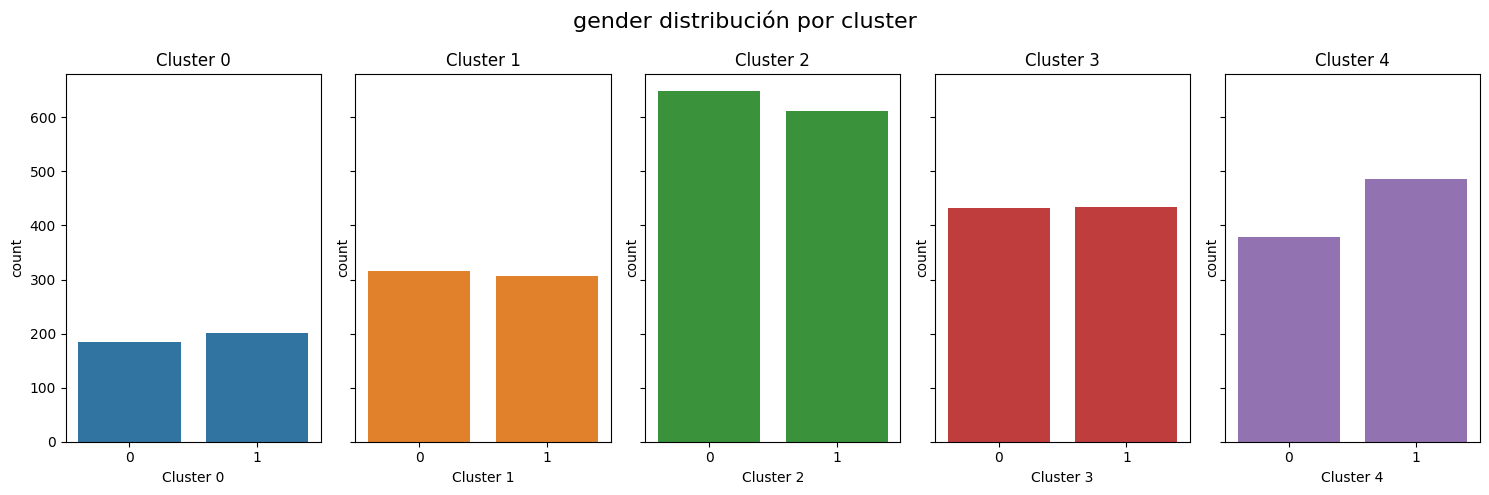

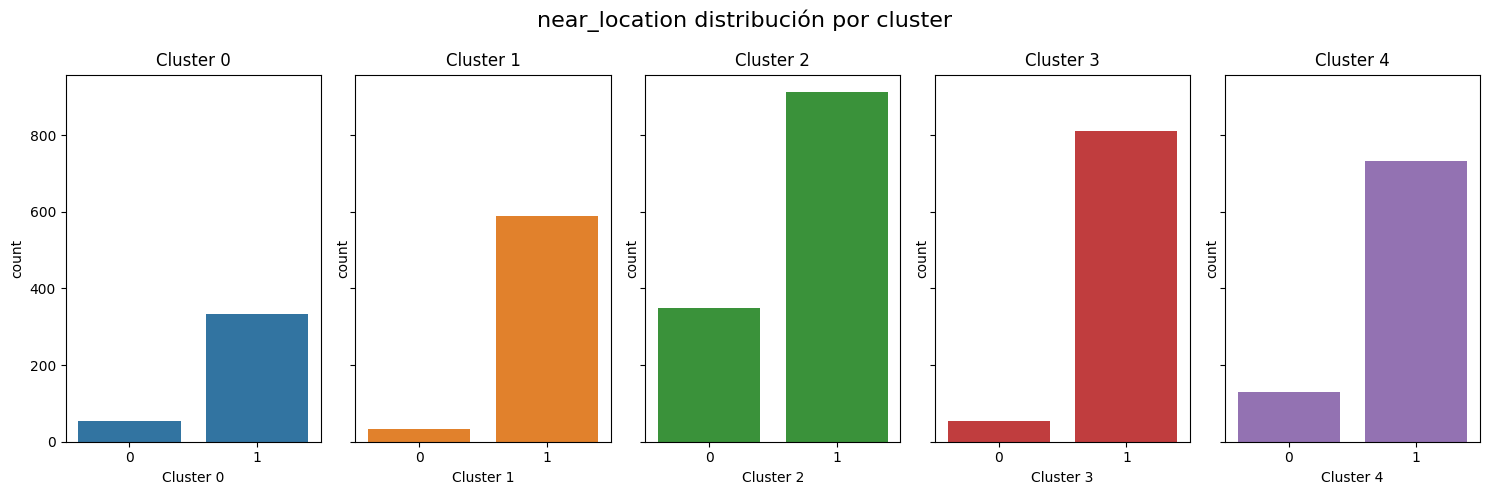

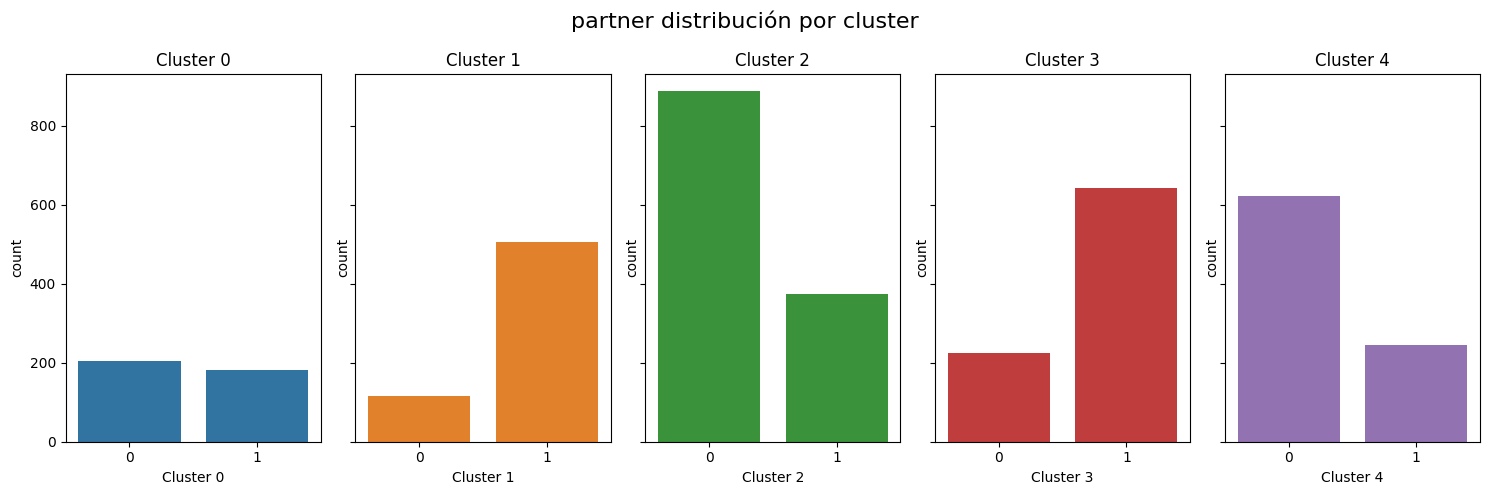

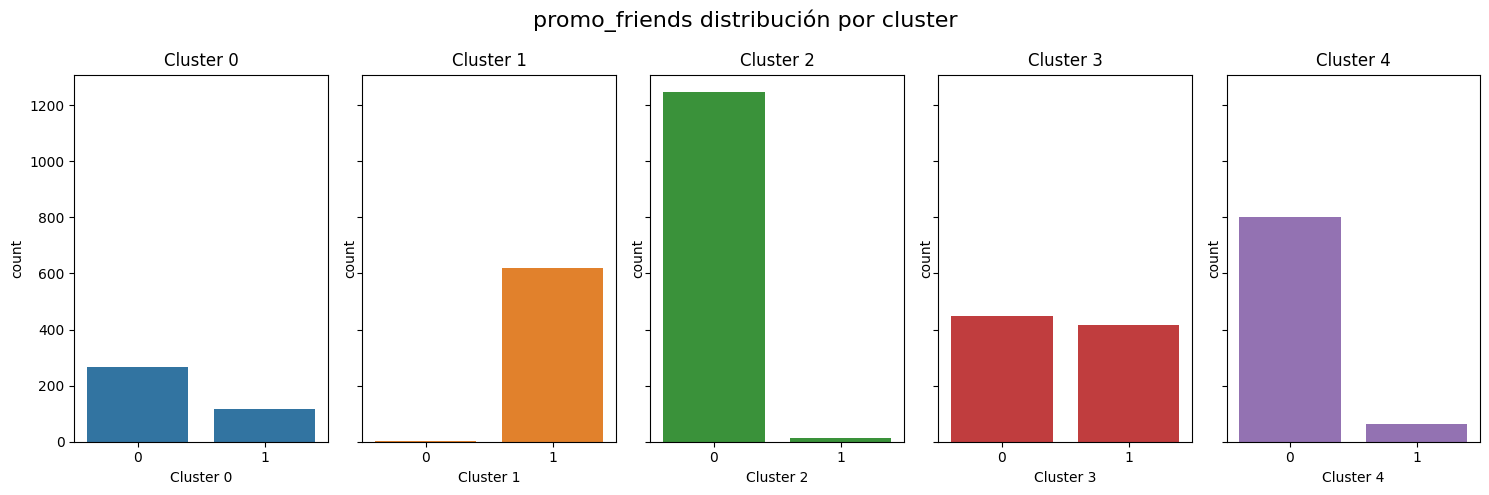

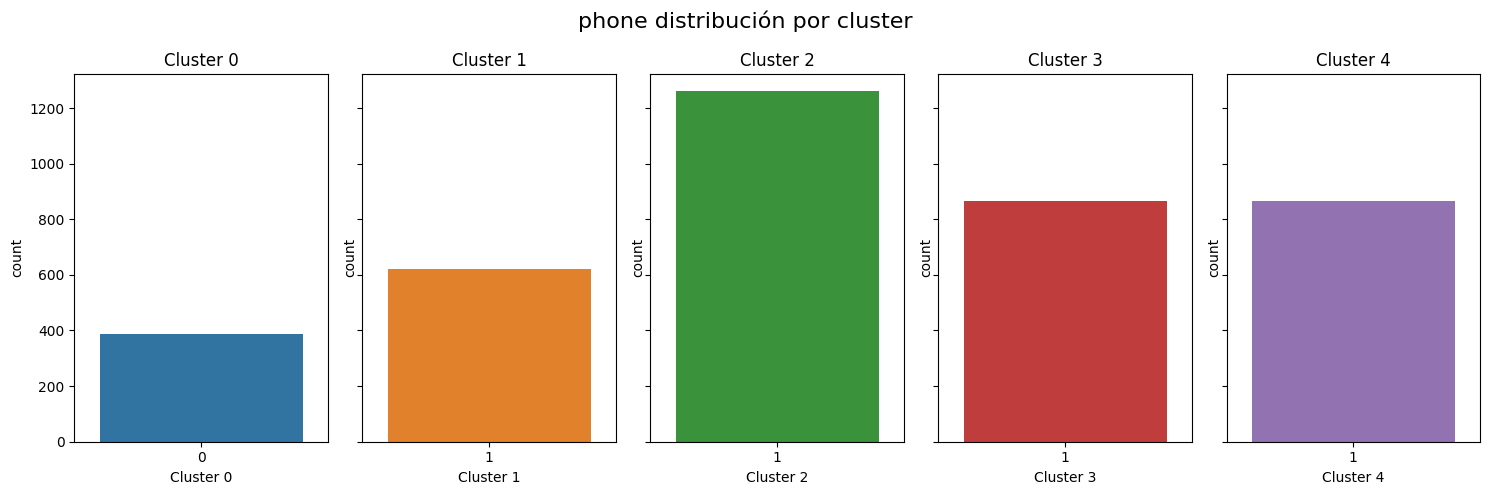

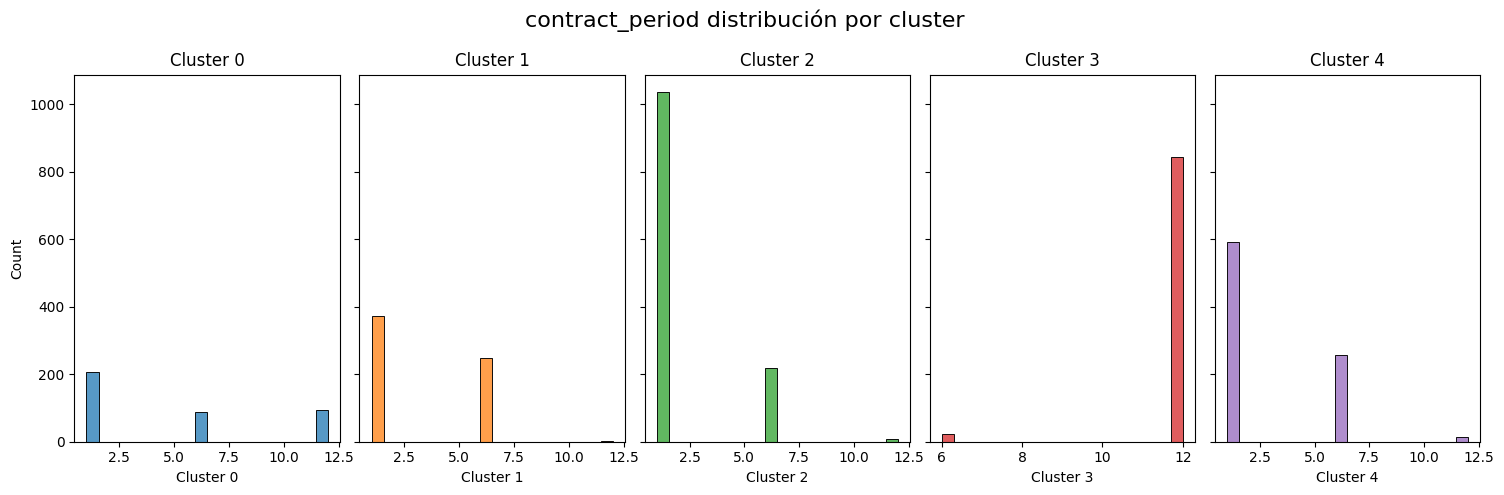

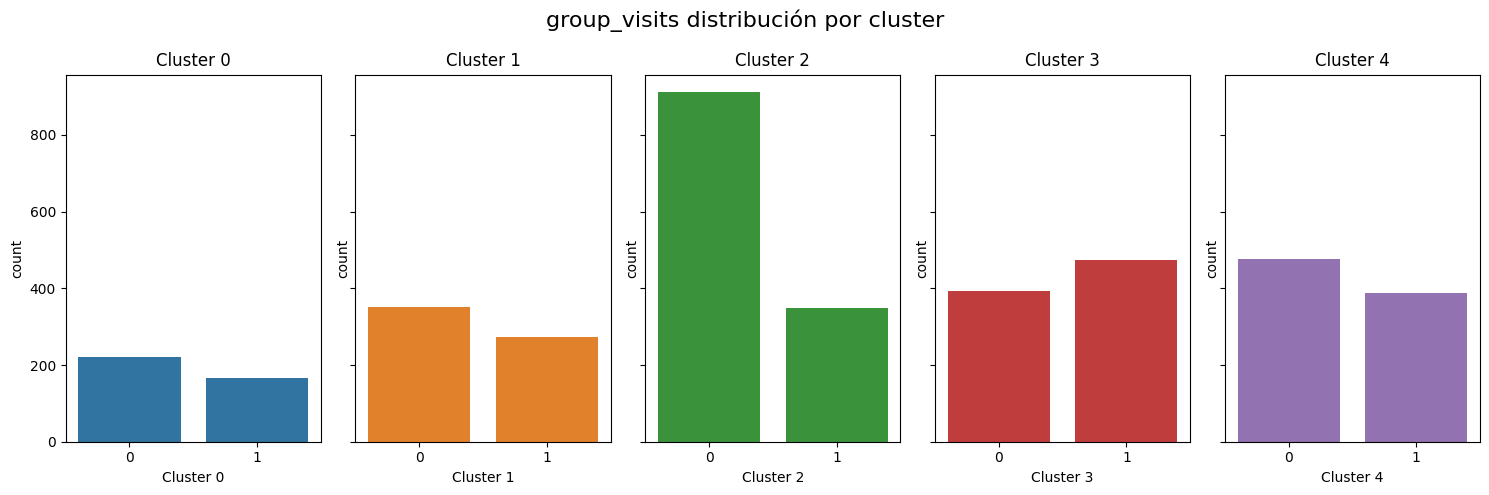

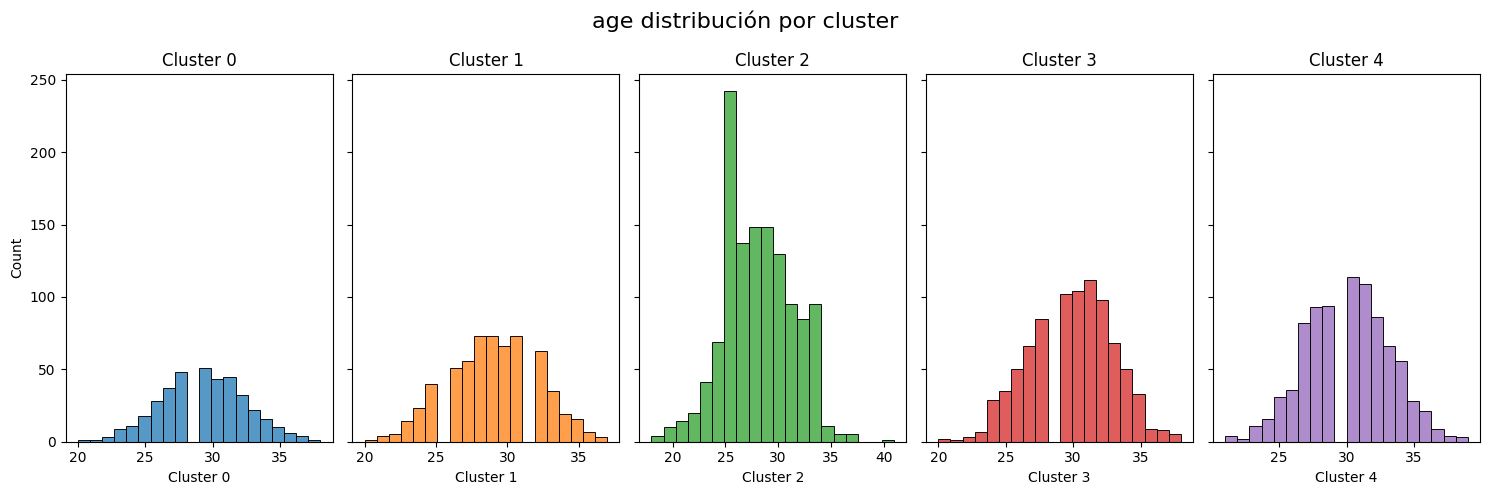

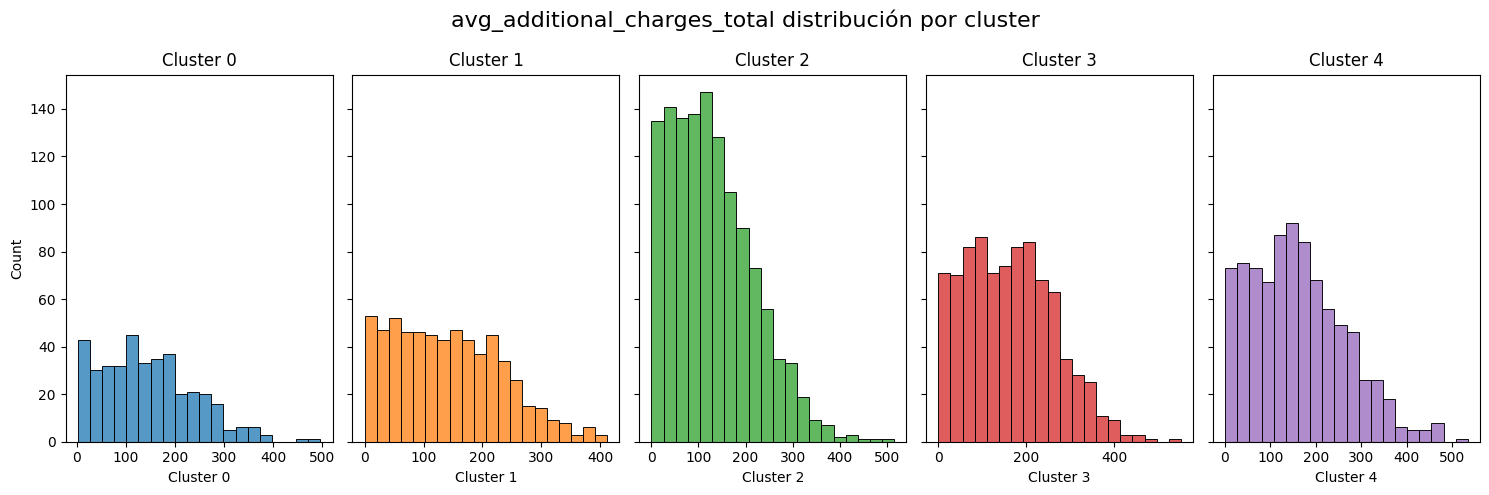

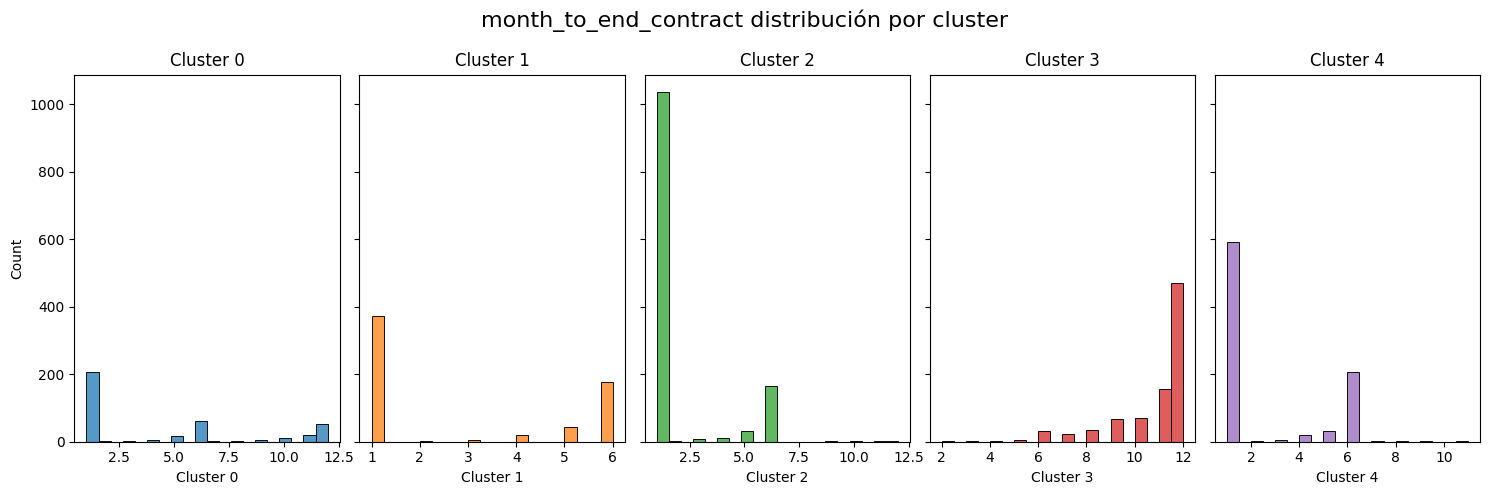

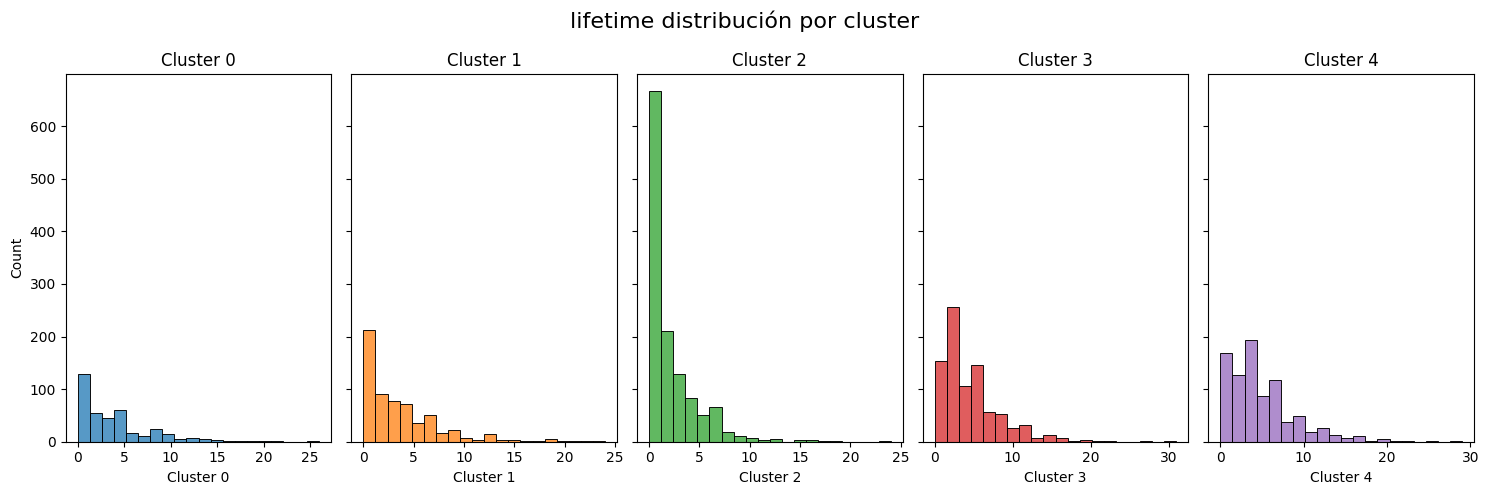

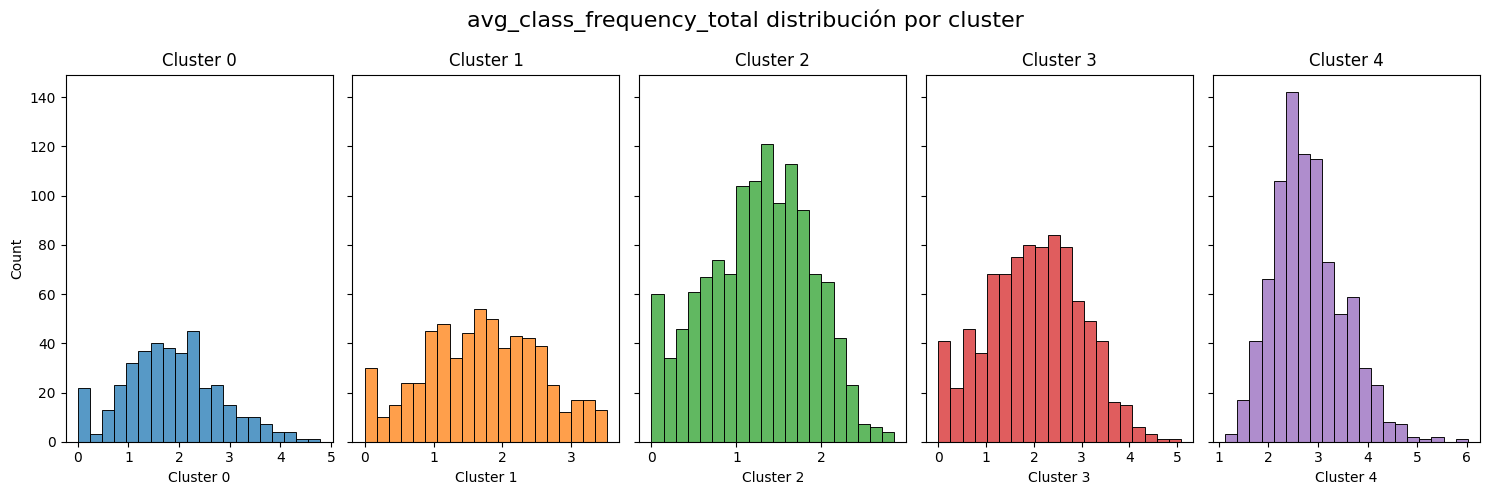

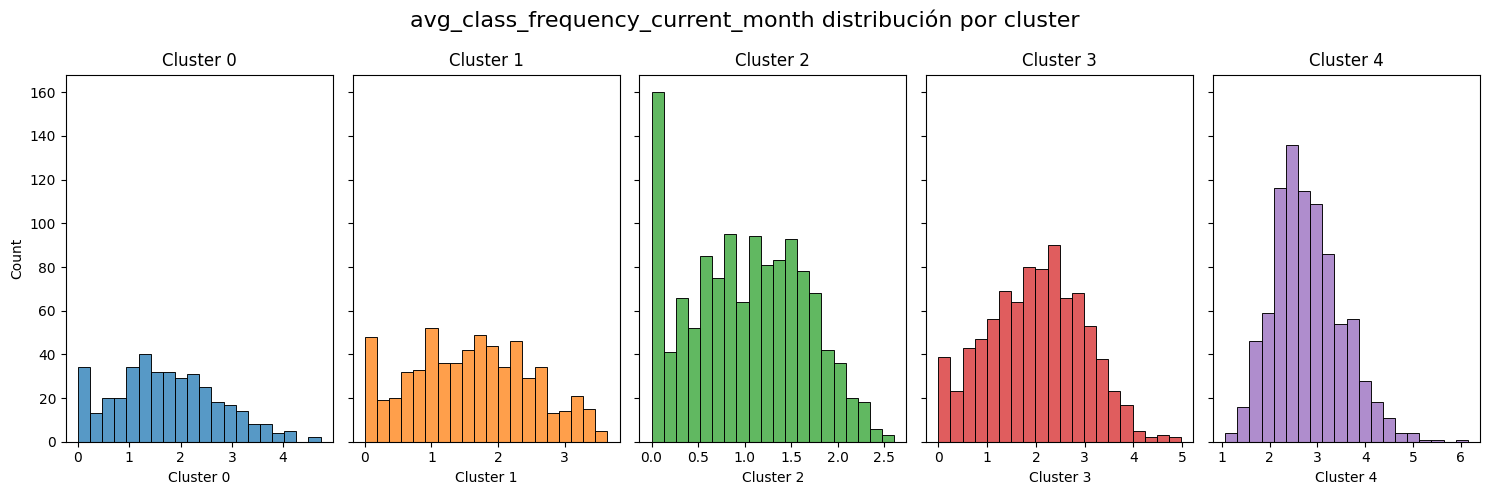

In [36]:
binary_features = gym.columns[(gym.nunique() == 2)]
features = gym.drop(['churn', 'cluster_km'], axis=1).columns
palette = sns.color_palette("tab10", 5)

for feature in features:
    fig, axes = plt.subplots(1, 5, sharey=True, figsize=(15, 5))
    
    for i, cluster in enumerate(range(5)):
        ax = axes[i]
        cluster_data = gym[gym['cluster_km'] == cluster]
        
        if feature in binary_features:
           
            sns.countplot(data=cluster_data, x=feature, ax=ax, palette=[palette[i]])
        else:
       
            sns.histplot(data=cluster_data, x=feature, bins=20, ax=ax, color=palette[i])
        
        ax.set_xlabel(f'Cluster {cluster}')
        ax.set_title(f'Cluster {cluster}')
    
    fig.suptitle(f'{feature} distribución por cluster', fontsize=16)
    plt.tight_layout()
    plt.show()


Observaciones sobre las características y comportamientos de los clientes en cada clúster:

- **Distribución por género**: La distribución por género es bastante equitativa en todos los clústeres.
- **Proximidad al gimnasio**: 
  - Clúster 1: Individuos que no viven cerca del gimnasio.
  - Otros clústeres: Proximidad variada.
- **Afiliación a empresa asociada**:
  - Clúster 2: Principalmente individuos que no trabajan en una empresa asociada.
  - Otros clústeres: Más diversidad.
- **Inscripción a través de un amigo**: 
  - Clúster 4: Mayor proporción de individuos que se inscribieron a través de un amigo en comparación con otros clústeres.
- **Contacto telefónico**: Los clientes de todos los clústeres dejaron sus contactos telefónicos, lo que indica un comportamiento normal.
- **Períodos de contrato**: Los clientes de todos los clústeres exhiben períodos de contrato diversos, siendo los clientes del Clúster 2 los que predominantemente optan por un período de un mes.
- **Asistencia a sesiones grupales**: Los clientes del Clúster 2 tienen una tasa de asistencia a sesiones grupales más baja en comparación con otros clústeres.
- **Rango de edad**: Todos los clústeres tienen edades de clientes que oscilan entre los 22 y 37 años.
- **Gasto en características adicionales**: Los individuos de todos los clústeres gastan aproximadamente entre $100 y $300 en características adicionales del gimnasio.
- **Valor de vida**: Los clientes del Clúster 2 tienen un valor de vida significativamente menor en comparación con otros clústeres.
- **Frecuencia de clases**: Los clientes de todos los clústeres tienen una frecuencia promedio de clases de alrededor de 3 clases.


### Calcula la tasa de cancelación para cada clúster (utiliza el método groupby()). ¿Difieren en términos de tasa de cancelación? ¿Qué grupos son propensos a irse y cuáles son leales?

In [32]:
churn_rate = gym.groupby('cluster_km')['churn'].mean()
churn_rate = churn_rate.sort_values(ascending=False)
churn_rate

cluster_km
2    0.561111
0    0.266839
1    0.262058
4    0.079769
3    0.021915
Name: churn, dtype: float64

Cálculo de la tasa de abandono para cada clúster

Al calcular la tasa de abandono para cada clúster, podemos ver algunas diferencias significativas. Esto nos ayuda a identificar qué clústeres tienen una mayor probabilidad de que los clientes se vayan y cuáles son más leales.

Resultados de la tasa de abandono para cada clúster:

- **Clúster 2**: Tiene la tasa de abandono más alta con un sorprendente 49.58%. Parece que este clúster tiene una alta probabilidad de que las personas se vayan.
- **Clúster 1**: No se queda atrás, con una tasa de abandono del 40.21%. Es una cantidad considerable de personas que están considerando irse.
- **Clúster 4**: Tiene una tasa de abandono moderada del 26.68%. Aún es más alta de lo que nos gustaría, pero no tan mala como los dos primeros clústeres.
- **Clúster 3**: Tiene una tasa de abandono bastante baja del 13.58%. Parece que tienen algunos clientes leales que se quedan.
- **Clúster 0**: Tiene una tasa de abandono increíblemente baja de solo 1.26%. ¡Estos clientes son súper leales!

Los Clústeres 2 y 1 son más propensos a que las personas se vayan, mientras que los Clústeres 3 y 0 tienen clientes muy leales.


## conclusiones 

Análisis de Datos y Recomendaciones


entrenamos y validamos dos modelos: Regresión Logística y Bosque Aleatorio. Resultó que la Regresión Logística tuvo un rendimiento ligeramente mejor que el otro modelo.

Al agrupar a los usuarios en clústeres, descubrimos que el Clúster 2 tenía la tasa de abandono más alta, mientras que el Clúster 0 tenía la más baja. Notamos algunos factores que diferenciaban estos clústeres y que potencialmente afectan su tasa de abandono:

- **Proximidad al gimnasio**: Parece que estar cerca del gimnasio influía en si un miembro se quedaba o se iba.
- **Empresas asociadas**: Los empleados de empresas asociadas tenían más probabilidades de quedarse.
- **Promoción por amigos**: Los miembros que se unieron a través de recomendaciones de amigos tendían a tener una mayor retención.

Recomendaciones para mejorar la interacción y retención de clientes

1. **Enfocarse en asociaciones con más empresas**: Animar a los empleados de estas empresas a unirse y quedarse más tiempo en el gimnasio.
2. **Ofrecer descuentos y promociones para períodos de contrato más largos**: Incentivar a los miembros a comprometerse por un período más extendido.



